In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
import seaborn as sns
sns.set()

In [3]:
def density_1(x):
    return 1 / (x**3)

def density_2(x):
    return np.abs(np.sin(x**2 + x**(1/2) - 1))

def density_3(x):
    return (np.abs(np.sin(x**2 + x**(-1/2) - 1)) + 0.5) / np.sqrt(x)


C:\Users\Asus\AppData\Local\Temp\ipykernel_27836\3521495471.py:8: RuntimeWarning: divide by zero encountered in power
  return (np.abs(np.sin(x**2 + x**(-1/2) - 1)) + 0.5) / np.sqrt(x)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27836\3521495471.py:8: RuntimeWarning: invalid value encountered in sin
  return (np.abs(np.sin(x**2 + x**(-1/2) - 1)) + 0.5) / np.sqrt(x)


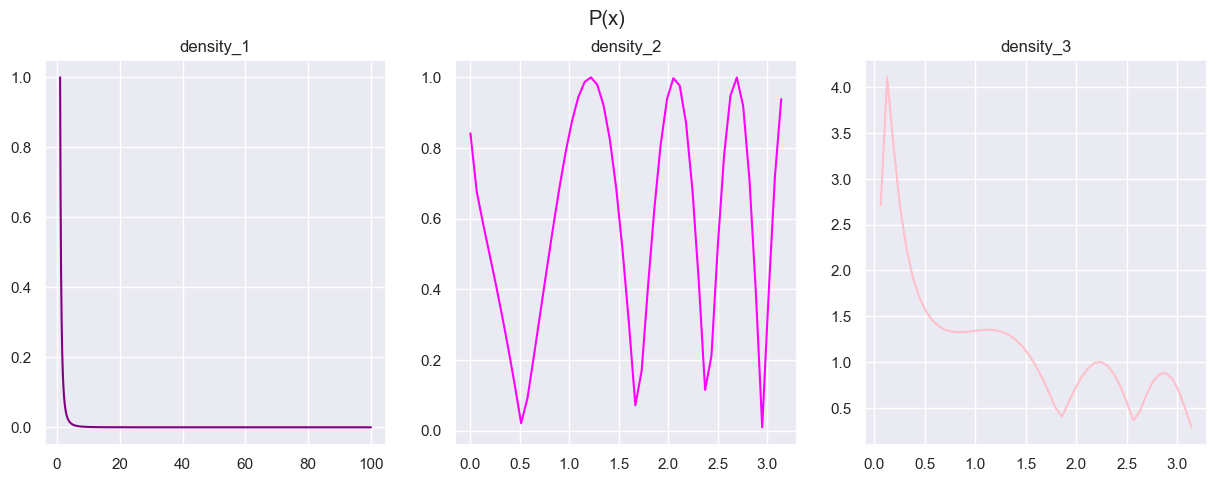

In [68]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

Y = np.linspace(1,100, 10000)
ax[0].plot(Y, density_1(Y), c="purple")
ax[0].set_title("density_1")

X = np.linspace(0, np.pi)
ax[1].plot(X, density_2(X), c="magenta")
ax[1].set_title("density_2")

ax[2].plot(X, density_3(X), c="pink")
ax[2].set_title("density_3")

plt.suptitle("P(x)")
plt.show()

In [36]:
def first_generator(density, N, a = 0, b = 100):
    """generate random number for specific density 

    Args:
        density (func): density function
        N (int): number of points
        a (int, optional): low number for x. Defaults to 0.
        b (int, optional): high number for x. Defaults to 100.

    Returns:
        _type_: _description_
    """
    X = []
    while len(X) < N:
        x = np.random.uniform(a, b)
        y = np.random.rand()
        if y < density(x) :
            X.append(x)
    return X

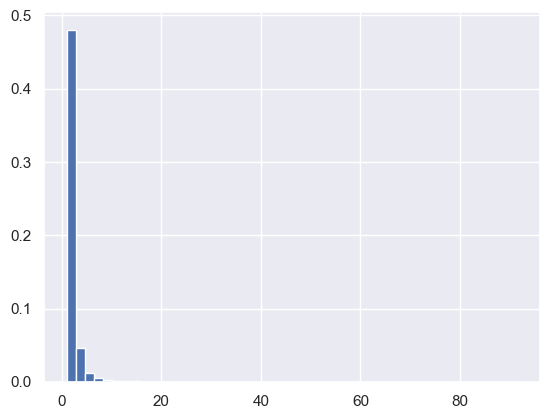

In [37]:
Y_den_1 = first_generator(density_1, 10**4, a=1, b=100)
plt.hist(Y_den_1, density=True, bins=50)
plt.show()

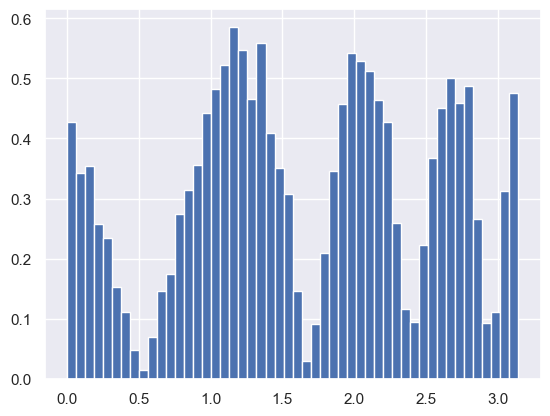

In [61]:
Y_den_2 = first_generator(density_2, 10**4, a=0, b=np.pi)
plt.hist(Y_den_2, density=True, bins=50)
plt.show()

In [57]:
def second_generator(density, N, a = 0, b = 100):
    X = []
    x_0 = np.random.uniform(a, b)
    while len(X) < N:
        x_new = np.random.uniform(a, b)
        y = np.random.rand()
        if y < (density(x_new)/density(x_0)) :
            X.append(x_new)
            x_0 = x_new
        else:
            X.append(x_0)
    return X

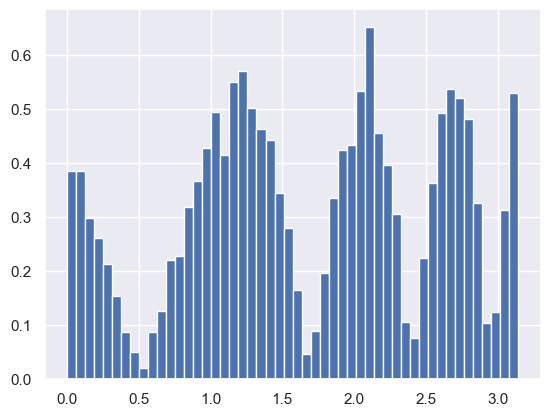

In [62]:
Y_den_2 = second_generator(density_2, 10000, a=0, b=np.pi)
plt.hist(Y_den_2, density=True, bins=50)
plt.show()

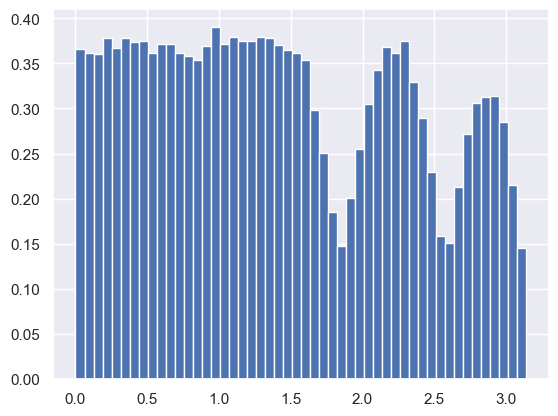

In [64]:
Y_den_3 = first_generator(density_3, 100000, a=0, b=np.pi)
plt.hist(Y_den_3, density=True, bins=50)
plt.show()

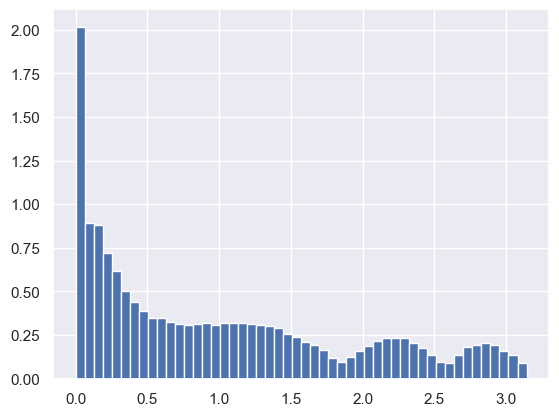

In [63]:
Y_den_3 = second_generator(density_3, 100000, a=0, b=np.pi)
plt.hist(Y_den_3, density=True, bins=50)
plt.show()

In [65]:
def third_generator(density, N, a, b):
    X = []
    x_0 = np.random.uniform(a, b)
    while len(X) < N:
        x_new = x_0 + np.random.normal(0, 0.1)
        while x_new > b or x_new < a:
            x_new = x_0 + np.random.normal(0, 0.1)

        alpha = min(1, (density(x_new)/density(x_0)))
        if np.random.rand() <= alpha :
            X.append(x_new)
            x_0 = x_new
        else:
            X.append(x_0)
    return X

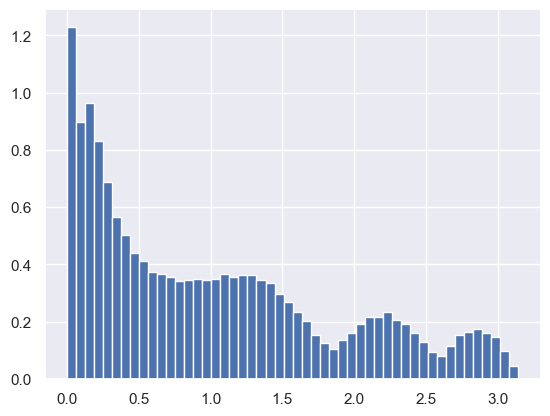

In [69]:
Y_den_3 = third_generator(density_3, 100000, a=0.001, b=np.pi)
plt.hist(Y_den_3, density=True, bins=50)
plt.show()